# Data Analysis

La data analyse est souvent conjointe au nettoyage des données (voir notebook précédent).  
Le but est de bien comprendre et assimiler les données pour en faire quelque chose d'utile et d'utilisable.

In [13]:
# Manipulation de dataframe
import pandas as pd
import numpy  as np

# Visualisation (graphique)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [14]:
# Allow to print multiple output int the notebook
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [15]:
df = pd.read_csv('./dataset/winequality-red.csv', sep=',')

## Dataset inspection
### General dataframe diagnostic
On va dans un premier temps faire une analyse générique des données, applicable quasiment pour tout les types de datasets

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.shape

#it's return ROW and COLUMNS

(1599, 12)

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Check missing values

In [20]:
df.count()
# df.isna().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

Apparement, pas de valeurs manquantes dans ce dataset... On peux donc passer a l'élimination des doublons !

In [21]:
df.shape

(1599, 12)

In [22]:
df.drop_duplicates(inplace=True) # Suppression des doublons
df.shape

(1359, 12)

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


## Analysis

### Univariate: Quality - The target
Examinez la variable de qualité et sa distribution.

In [24]:
# Math the Mode, Median and Mean
mean = df['quality'].mean()
median = df['quality'].median()
mode = df['quality'].mode()[0]

mean, median, mode


(5.6232523914643116, 6.0, 5)

In [25]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Quality')

Text(0, 0.5, 'Wine observations')

<AxesSubplot:xlabel='Quality', ylabel='Wine observations'>

Mean: 6 - Median: 6 - Mode: 5


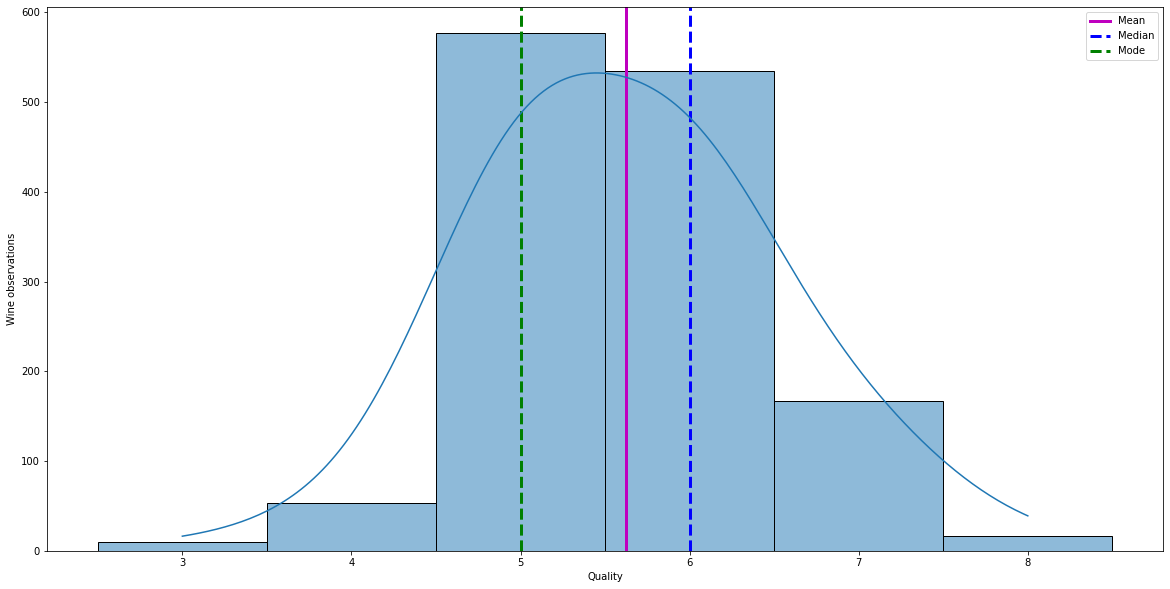

In [26]:
# Resize the graph size
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')

plt.axvline(mean, color='m', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

# Label the axis
plt.xlabel('Quality')
plt.ylabel('Wine observations')
plt.legend()

# Show the graph
sns.histplot(data=df, x="quality", kde=True, kde_kws={'bw_adjust': 3}, discrete=True)
print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

# plt.savefig('quality.svg', dpi=300, bbox_inches='tight')

### Kurtosis & skewness
The graph seems a bit right skewed

In [27]:
skew = df['quality'].skew()
kurtosis = df['quality'].kurt()

print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 0.19240658731658308 - Kurtosis: 0.3402560880620915


### Outliers
The outliers seems distributed equally. We won't remove them

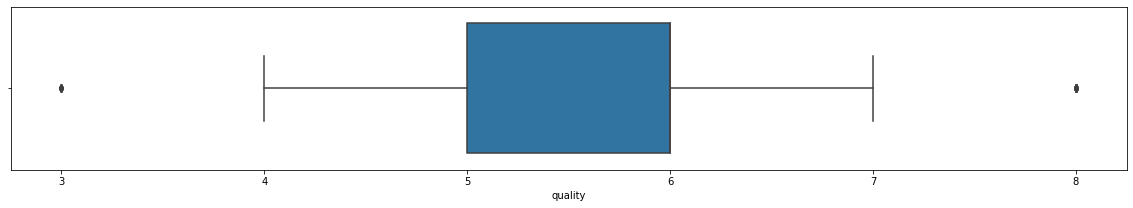

In [28]:
# Print the outliers horizontally
plt.figure(figsize=(20,3))
sns.boxplot(x=df["quality"]);

## Bivariate: Heatmap
Take a look at Heatmap to find correlations bewteen Quality and other variables.

(<Figure size 1440x864 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

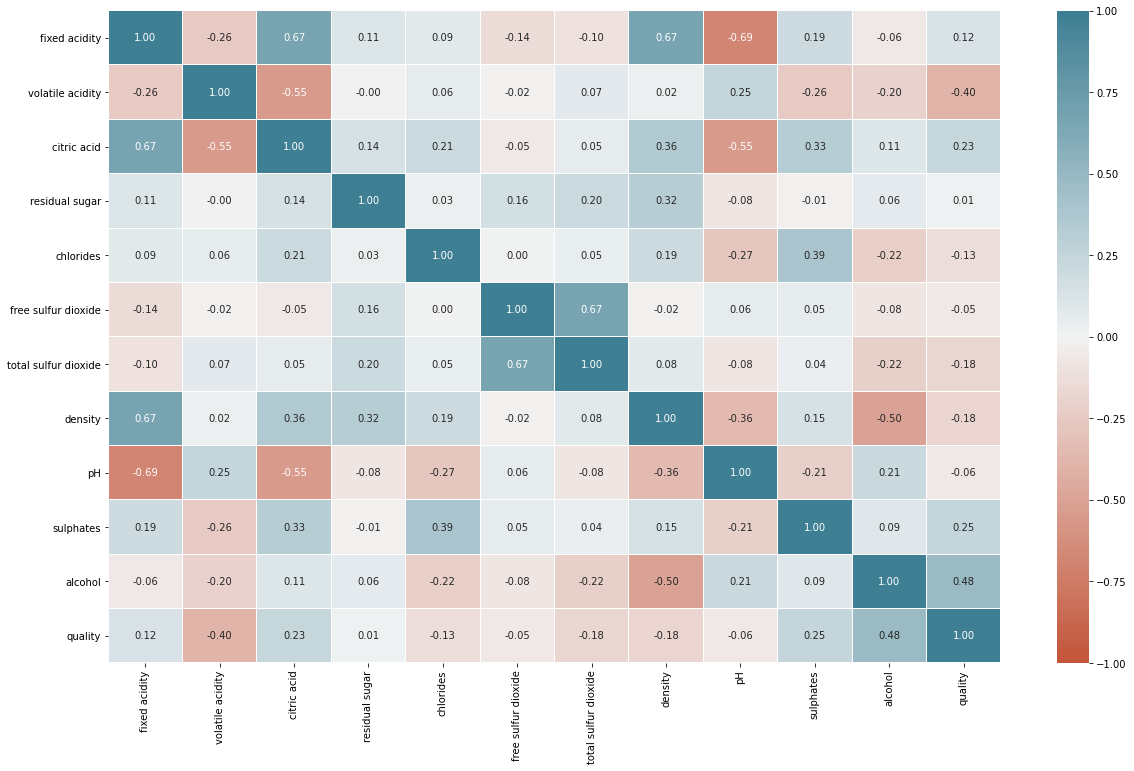

In [29]:
# Print the heatmap
plt.subplots(figsize=(20, 12))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

#plt.savefig('heatmap.svg', dpi=300, bbox_inches='tight')
plt.show()


### Quality influences
with Alcohol  

0.48034289800199176

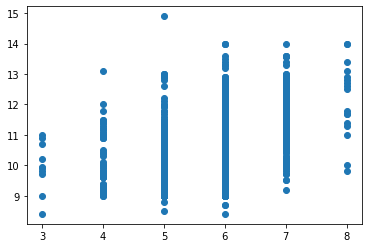

In [30]:
df['quality'].corr(df['alcohol'])

# Basic Graph
plt.scatter(df['quality'],df['alcohol'])

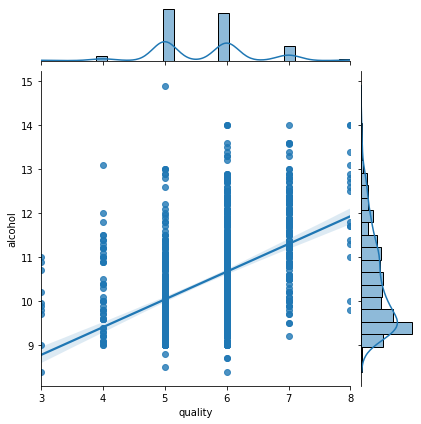

In [31]:
# More advanced graph
sns.jointplot(data=df, x="quality", y="alcohol", kind="reg")

The alcohol distribution seems right skewed: The majority of the wines has around 9 degress of alcohol.

Trend: **The more alcohol in the wine, the better is the quality.**

Now, **I should do the same with the other strong correlations** but for the demo I'll stop there.